In [1]:
import numpy as np, pandas as pd
import networkx as nx
from dowhy import gcm

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [2]:
#Treat dataset

#Import data 
# data = pd.read_csv('../datasets/consolidated.csv',header=0, index_col=0)
data = pd.read_csv('../Datasets/Networkwise/consolidated_5s.csv',header=0, index_col=0)
consolidated = pd.DataFrame(data)


consolidated = consolidated.drop(columns=['experiment', 'topology'])#, 'messageBandwidth'])#, 'gossipBandwidth'])#, 'messageDuplicated'])#, 'n_nodes', 'consensus', 'messageDuplicated'])
# consolidated = consolidated.loc[consolidated['totalBandwidth'] > 0]
# consolidated.head(100)

consolidateddiff = consolidated.dropna().dropna()

X = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']].to_numpy()
training_data = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']]


training_data.head(50)

,d,messageReceived,graft,prune,dlo,dhi,dout,messageOverhead,topics,topicSize
0,8,43.0,0.0,0.0,6,12,2,321.0,1,16
1,8,54.0,0.0,0.0,6,12,2,389.0,1,16
2,8,96.0,0.0,0.0,6,12,2,702.0,1,16
3,8,88.0,0.0,0.0,6,12,2,629.0,1,16
4,8,61.0,0.0,0.0,6,12,2,454.0,1,16
5,8,96.0,0.0,0.0,6,12,2,686.0,1,16
6,8,85.0,0.0,0.0,6,12,2,615.0,1,16
7,8,85.0,0.0,0.0,6,12,2,649.0,1,16
8,8,98.0,0.0,0.0,6,12,2,724.0,1,16
9,8,74.0,0.0,0.0,6,12,2,559.0,1,16


In [13]:
dataset = training_data.groupby(['d', 'dlo','dhi','dout','topics', 'topicSize']).mean()
dataset = dataset.reset_index()
dataset = dataset.loc[(dataset['d'] == 8) & (dataset['dlo'] == 6) & (dataset['dhi'] == 12) & (dataset['dout'] == 2)]

topics = dataset[['topics']].drop_duplicates().to_numpy()
print(topics)

dataset.head(100)

[[ 1]
 [16]
 [17]
 [18]
 [24]]


,d,dlo,dhi,dout,topics,topicSize,messageReceived,graft,prune,messageOverhead
77,8,6,12,2,1,16,96.172027,0.450853,0.043613,740.368189
78,8,6,12,2,1,17,163.098819,1.482909,0.146053,1264.625855
79,8,6,12,2,1,18,89.050053,0.377503,0.043994,629.874605
80,8,6,12,2,16,1,19.852872,0.961097,0.035566,192.841716
81,8,6,12,2,17,1,19.458949,0.924193,0.033662,184.955118
82,8,6,12,2,18,1,17.346278,0.697183,0.025755,161.059356
83,8,6,12,2,24,1,25.640884,0.070190,0.007496,242.686802


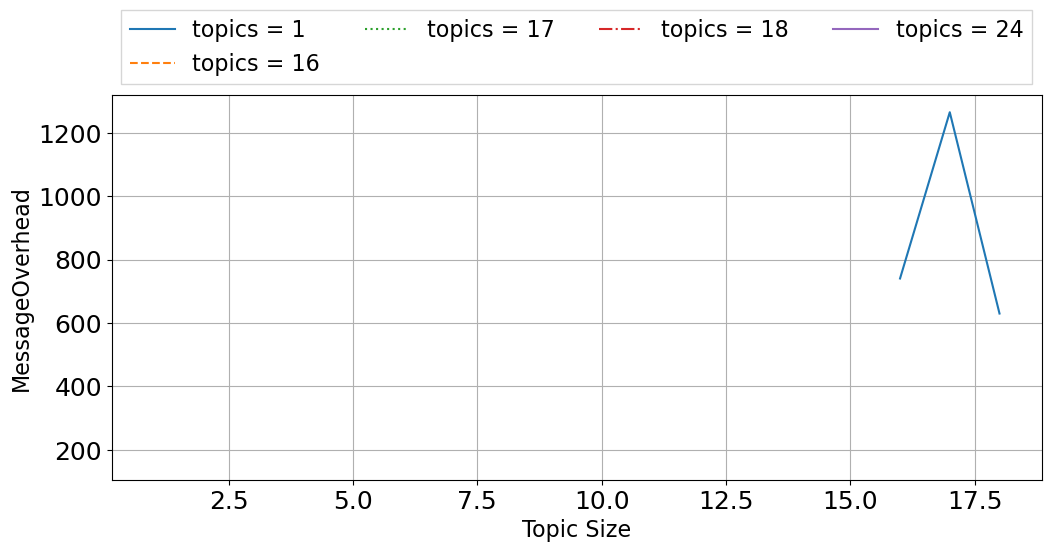

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

plt.style.use('default')

linetypes = ['solid', 'dashed', 'dotted', 'dashdot', 'solid', 'dashed', 'dotted', 'dashdot','solid', 'dashed', 'dotted', 'dashdot' ]

line = 0
for t in np.nditer(topics):
    plotter = dataset.loc[dataset['topics'] == t]
    ax.plot(plotter['topicSize'], plotter['messageOverhead'], label="topics = "+str(t), linestyle=linetypes[line])
    line += 1
    
# ax2.bar(simulated['topicSize'], simulated['topics'], color ='pink', width = 0.4, alpha=0.5)
ax.set(xlabel='Topic Size', ylabel='MessageOverhead')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update({'font.size': 16})


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=4, fancybox=False, shadow=False)

# ax.set_ylim(0, 25)
# ax.legend(loc='upper left', ncols=2)
ax.grid()

fig.savefig("./figures/topicSize.png")
fig.savefig('./figures/topicSize.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight', dpi=600)
plt.show()

In [26]:
dataset = training_data.groupby(['d']).mean()
dataset = dataset.reset_index()


dataset.head(100)

,d,messageReceived,graft,prune,dlo,dhi,dout,messageOverhead,topics,topicSize
0,2,30.085679,3.194371,2.904836,1.000000,4.000000,5.000000,31.925206,18.082569,3.538796
1,3,23.622456,0.744023,0.000218,2.000000,5.566254,2.000000,174.405037,16.166173,3.793460
2,4,32.308667,0.414508,0.000000,2.000000,7.000000,2.000000,88.893808,12.562050,6.411540
3,5,46.311172,0.893715,0.498927,3.347243,15.485847,3.305515,265.567697,13.119044,6.714205
4,6,38.252677,0.529064,0.039894,3.900784,8.000000,3.222851,192.094336,14.148993,6.394751
5,7,46.513258,2.254995,1.849982,1.000000,9.000000,9.000000,248.415305,13.972999,5.875772
6,8,37.500961,0.494754,0.020809,5.409966,15.069740,2.075199,324.396935,15.611423,5.140229
7,10,26.477815,0.680848,0.018787,8.000000,16.000000,2.954232,213.709290,16.428680,3.672193
8,12,22.299300,0.677573,0.001059,8.000000,21.000000,4.000000,144.762961,14.972459,4.036074
9,15,30.118772,0.801404,0.003158,4.000000,20.000000,8.000000,318.571404,16.505351,3.494386


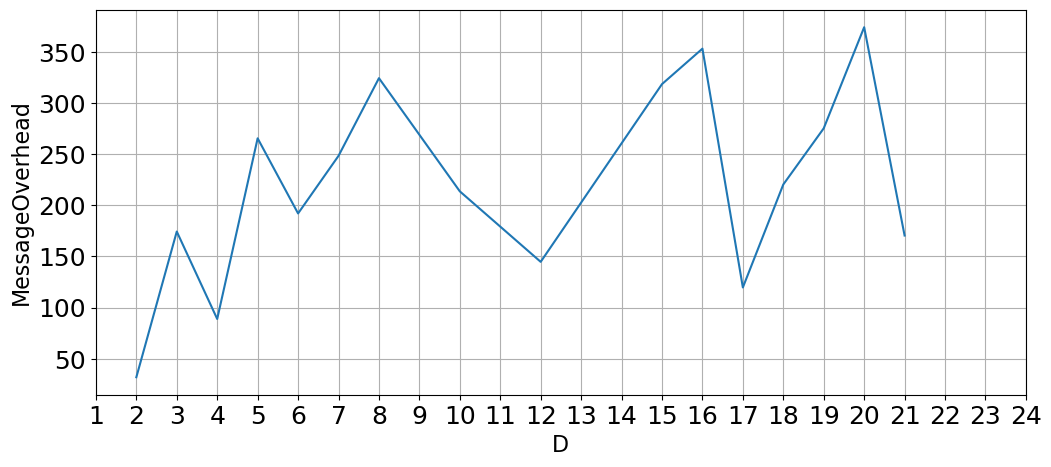

In [27]:
values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
fig, ax = plt.subplots(figsize=(12, 5))

# for x in topicsIntervention:
#     plotter = intervention.loc[intervention['topics'] == x]

ax.plot(dataset['d'], dataset['messageOverhead'])

# ax2.bar(simulated['topicSize'], simulated['topics'], color ='pink', width = 0.4, alpha=0.5)
ax.set(xlabel='D', ylabel='MessageOverhead')


plt.xticks(ticks=values, labels=values,fontsize=18)
# plt.xticks(x, labels, rotation ='vertical') 

plt.yticks(fontsize=18)
plt.rcParams.update({'font.size': 16})

# ax.set_ylim(0, 25)
# ax.legend(loc='upper right', ncols=2)
ax.grid()

fig.savefig("./figures/dIntervention.png")
fig.savefig('./figures/dIntervention.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight', dpi=600)
plt.show()
